#Práctico 2.b - Preprocesamiento de texto

En base al dataset provisto por la cátedra, aplicar las siguientes tareas de preprocesamiento:

Tokenización.

Remoción de stopwords.

Stemming.

Representar la información resultante utilizando Tf-Idf.

Visualizar el resultado.


Elegir 3 alternativas de preprocesamiento que evidencien una reducción o cambio de dimensiones en el dataset. Explicar la variación de dimensionalidad después de cada paso.

**Lectura del archivo de Drive**

In [ ]:
from google.colab import drive
import pandas as pd
# Montamos la unidad de Google Drive (solicitará autorización)
drive.mount('/content/gdrive', force_remount=True)

# Copia el zip al entorno de ejecución y los descomprime
path = "/content/gdrive/My Drive/spam.csv"

df = pd.read_csv(path, encoding="latin-1")
df.drop(['x1', 'x2', 'x3'], axis=1, inplace=True) # se eliminan las columnas innecesarias x1, x2 y x3
df.head() # se muestran las primeras filas del dataframe (etiquetas de "spam" o "ham" junto con su texto asociado)

In [ ]:
df_spam = df[df['v1'] == 'spam']
df_ham = df[df['v1'] == 'ham']
print(df_spam.shape, df_ham.shape) # se muestra cuántas ocurrencias hay de textos de spam o de ham

**Tokenización**

Primero que nada se aplica tokenización sobre el conjunto de textos de los mails a fin de separar el texto en tokens y darle a cada uno un id numérico.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text_mails = df['v2'].tolist() # se obtiene la lista de textos de la columna v2

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_mails)
features = vectorizer.get_feature_names_out() # se obtienen los tokens extraídos por el vectorizer

print(features)
print(X.toarray())
print(X)

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>
  Coords	Values
  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (1, 5504)	1
  (1, 4512)	1
  (1, 4318)	1
  (1, 8392)	1
  (1, 5533)	1
  (2, 4087)	1
  (2, 3358)	1
  :	:
  (5570, 4218)	1
  (5570, 8313)	1
  (5570, 1084)	1
  (5570, 4615)	1
  (5570, 7039)	1
  (5570, 3308)	1
  (5570, 7627)	1
  (5570, 1438)	1
  (5570, 5334)	1
  (5570, 2592)	1
  (5570, 8065)	1
  (5570, 1778)	1
  (5570, 7049)	1
  (5570, 2892)	1
  (5570, 3470)	1
  (5570, 1786)	1
  (5570, 3687)	1
  (5570, 4161)	1
  (5570, 903)	1
  (5570, 1546)	1
  (5571, 7756

**Visualización**

Se visualizan a partir de un FreqDistVisualizer de yellowbrick las features o tokens extraídos por el vectorizer, junto con sus respectivas frecuencias (a partir de X, que es el resultado del fit_transform de la lista de textos usando el vectorizer). Cabe aclarar que además se muestran las siguientes estadísticas en el gráfico:

- "vocab": Cantidad de features o tokens distintos
- "words": Cantidad de "palabras" en total, que tiene en cuenta la repetición o frecuencia de los tokens
- "hapax": Cantidad de features o tokens con frecuencia 1


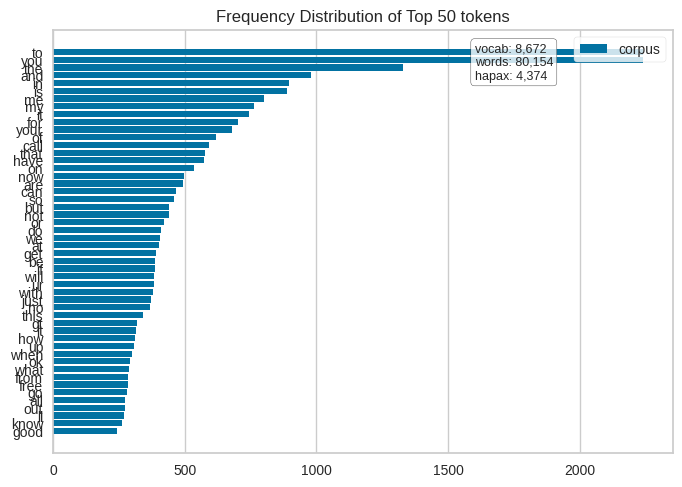

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
import numpy as np
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h') # se muestran a lo sumo los 50 más frecuentes si es que hay esa cantidad o mas
visualizer.fit(X)
visualizer.show()

**Tokenización + Remoción de stopwords**

Se eliminan las stopwords del idioma inglés (que es en el que están escritos los mails). Estas son palabras demasiado comunes que en general no suelen aportar nada relevante por sí solas. Claramente esto reduce tanto la cantidad de features o tokens como de palabras en total (ya que los tokens asociados a estas palabras dejan de estar, y por ende todas sus ocurrencias en el texto). Por ende, se reduce la dimensionalidad del dataset. En textos amplios, esta técnica generalmente reduce mucho el dataset (ya que suelen tener muchas stopwords).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

text_mails = df['v2'].tolist() # se obtiene la lista de textos de la columna v2

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_mails)
features  = vectorizer.get_feature_names_out()

print(features)
print(X.toarray())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Se puede ver cómo pasó de haber 8672 features o tokens a 8404. Si bien pueden no parecer tantos tokens de diferencia, la cantidad de palabras en el dataset se redujo de 80154 a 45601, porque probablemente muchos tokens que representaban stopwords tenían una alta frecuencia, como era de esperarse (claro ejemplo es la palabra "to" que era la feature más frecuente y ahora ya no está). También se redujeron los hapax de 4374 a 4355. Estos son muy pocos de diferencia, lo cual tiene lógica ya que por lo general las stopwords son tan comunes que en un dataset muy amplio es extraño que tengan frecuencia 1, y por ende las hapax mayormente no suelen ser stopwords.

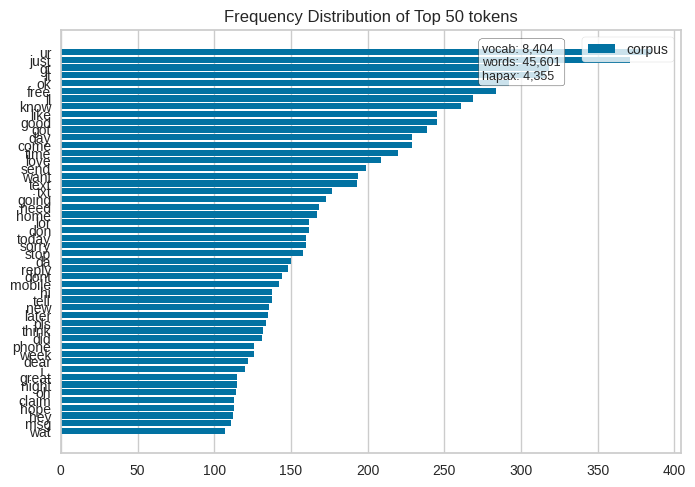

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
import numpy as np
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)
visualizer.show()

**Tokenización + Remoción de stopwords + Stemming**

Se aplica Stemming para reducir a las features o tokens del dataset a su raíz o también conocido como stem, que básicamente permite trabajar muchas variantes de una misma palabra como una sola, puesto que generalmente no aportan información distinta en sí. Para ello se usa un PorterStemmer de nltk y un analyzer construido a partir de un CountVectorizer. Cabe mencionar que al vectorizer a partir del cual se crea el analyzer se le pasa como parámetro las stop_words en vez de pasárselas al vectorizer utilizado para el fit, dado que si se pasaran al otro no tendría efecto el parámetro ya que si se envía un analyzer personalizado, ignora esos parámetros. En cambio, si se usara un tokenizer, ahí sí podrían pasarse directamente allí sin problemas.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

text_mails = df['v2'].tolist() # se obtiene la lista de textos de la columna v2

stemmer = PorterStemmer() # se construye un PorterStemmer que va a ser usado para obtener la stemming word de cada token, y así agrupar varias bajo una sola

analyzer = CountVectorizer(stop_words='english').build_analyzer() # se construye un analyzer que va a ser usado por la función enviada como analyzer del vectorizer, usando remoción de stop words en inglés para así eliminar los tokens irrelevantes

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc)) # esta función permite aplicar el stemming utilizando el analyzer definido

vectorizer = CountVectorizer(analyzer=stemmed_words)
X = vectorizer.fit_transform(text_mails)
features  = vectorizer.get_feature_names_out()

print(features)
print(X.toarray())

['00' '000' '000pe' ... 'ûïharri' 'ûò' 'ûówell']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Tal como se esperaba, se redujo la cantidad de features o tokens del dataset de 8404 a 7115 respecto a la técnica que solo utilizaba tokenización y remoción de stopwords. Evidentemente varias features pudieron agruparse en un solo stem en cada caso. Además, la cantidad de palabras en el dataset se mantuvo en 45601, lo cual tiene sentido ya que el hecho de agrupar a todas las variantes de una palabra bajo un stem, no quiere decir que haya eliminaciones de ellas, sino que se toman todas como la misma feature. Por ende, es lógico que aunque se reduzcan las features se mantenga la cantidad de palabras. Por último, la cantidad de hapax se redujo de 4355 a 3553 y esto se explica en el hecho de que probablemente algunas features que antes tenían frecuencia 1, pudieron ser agrupadas junto con otras en un mismo stem, lo que resulta en una única feature con frecuencia mayor a 1, y las que tenían frecuencia 1 ya no están. En consecuencia se reduce la cantidad de hapax.

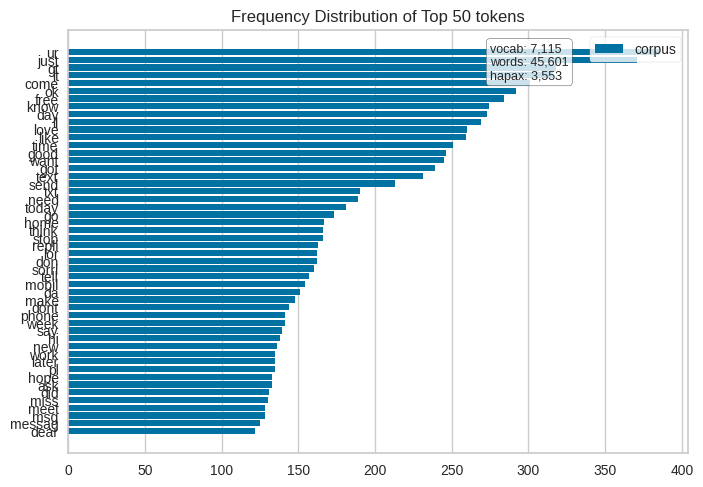

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
import numpy as np
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)
visualizer.show()

**Representación de información resultante mediante Tf-Idf**

Se usa TF-IDF Term (Term Frequency–Inverse Document Frequency) para representar la información resultante pero dando un peso determinado a cada feature o token. Básicamente lo que se hace es utilizar el TF (Term Frequency) para dar, dentro del documento, un mayor peso a aquellas features que aparecen con mayor frecuencia (ya que esto es un indicativo de que posee algún significado relevante para el texto). Por otra parte, se usa el IDF (Inverse Document Frequency) para dar un menor peso a las features que aparecen en muchos documentos (en este caso, sería en varios mails), ya que eso significa que probablemente no aportan concretamente al significado de ese documento y se trata de algo más global la mayoría o todos. Entonces, combinando ambos enfoques se logra una matriz de pesos, en este caso a partir del uso del TfidfTransformer, que toma como entrada la salida del fit del vectorizer anterior. Todo esto podría hacerse con un solo paso a partir del TfidfVectorizer que aplica automáticamente la transformación. De aquí en adelante no se usa esta salida de la transformación para visualizaciones con el FreqDistVisualizer ya que toma los pesos como si fueran frecuencias de las features, resultando un valor flotante que no tiene sentido.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***De acá en adelante se aplican las 3 técnicas de preprocesamiento adicionales, que pide el enunciado elegir para interpretar cambios en las dimensiones del dataset en cada paso. Se aplican una tras otra y en conjunto con las técnicas iniciales ya aplicadas para ver cómo avanza el tamaño del dataset con todas las técnicas.***

**Tokenización + Remoción de stopwords + Stemming + N-grams**

Se aplica la técnica de N-grams para agrupar las features o tokens en n-gramas. Básicamente se define un rango en el cual se pueden formar features compuestas (o individuales si 1 está dentro del rango), lo que permite atrapar tokens más amplios que los que se venían obteniendo hasta el momento. Esto suele tender a incrementar el tamaño del dataset ya que se forman nuevos tipos de tokens (aunque esto depende del rango definido, en ciertos casos podría achicarlo). En esta ocasión se consderarán unigramas y bigramas (1 o 2 tokens).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer

text_mails = df['v2'].tolist() # se obtiene la lista de textos de la columna v2

stemmer = PorterStemmer() # se construye un PorterStemmer que va a ser usado para obtener la stemming word de cada token, y así agrupar varias bajo una sola

tokenizer = CountVectorizer().build_tokenizer() # se construye un tokenizer

stop_words = text.ENGLISH_STOP_WORDS

def stem_tokenizer(doc): # esta función que actuará como tokenizer del vectorizer, usa el tokenizer definido para aplicar stemming luego de tokenizar y aplicar remoción de stopwords
    tokens = tokenizer(doc)
    return list(stemmer.stem(w) for w in tokens if w not in stop_words)

vectorizer = CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', ngram_range=(1,2)) # se consideran unigramas y bigramas
X = vectorizer.fit_transform(text_mails)
features = vectorizer.get_feature_names_out()

print(features)
print(X.toarray())


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['00' '00 easter' '00 sub' ... 'ûò stick' 'ûówell' 'ûówell û_']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Como se esperaba, se incrementó la cantidad de features (7115 a 35393), palabras (45601 a 85651) y hapax (3553 a 26347). Esto es porque ahora hay muchas más features y por ende palabras en consideración (todos los unigramas de antes más los bigramas), y obviamente al agregar muchos bigramas nuevos, muchos de ellos tienen frecuencia 1 y por eso se incrementan tantos los hapax.

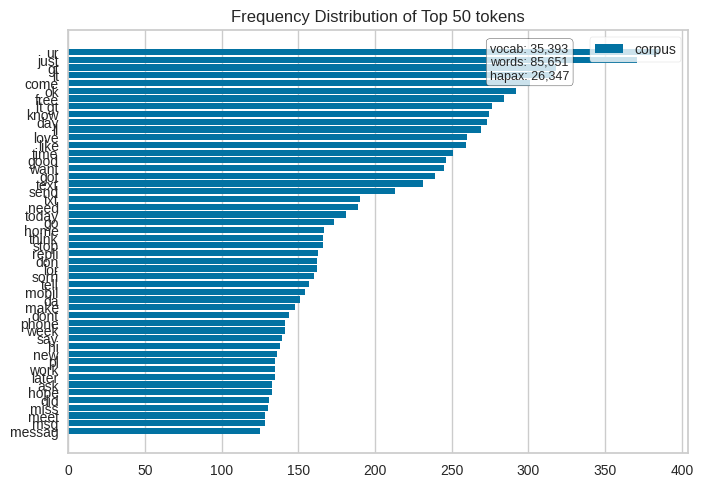

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
import numpy as np
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)
visualizer.show()

**Tokenización + Remoción de stopwords + Stemming + N-grams + Frecuencia mínima**

Se utiliza la técnica de frecuencia mínima con el objetivo de quedarse solamente con los tokens que tienen una frecuencia de un mínimo en adelante y así evitar que se consideren features probablemente irrelevantes, lo cual se deduce de su poca frecuencia. Es particularmente útil en conjunto con la técnica de n-gramas, ya que se balancea un poco quitando muchos de los n-gramas generados que probablemente no tengan un significado relevante (que era una consecuencia casi inevitable de aplicar esa técnica). Aparte que varios unigramas seguramente también van a ser excluidos. En este caso se estableció una frecuencia mínima de 2 para los tokens.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer

text_mails = df['v2'].tolist() # se obtiene la lista de textos de la columna v2

stemmer = PorterStemmer() # se construye un PorterStemmer que va a ser usado para obtener la stemming word de cada token, y así agrupar varias bajo una sola

tokenizer = CountVectorizer().build_tokenizer() # se construye un tokenizer

stop_words = text.ENGLISH_STOP_WORDS

def stem_tokenizer(doc): # esta función que actuará como tokenizer del vectorizer, usa el tokenizer definido para aplicar stemming luego de tokenizar y aplicar remoción de stopwords
    tokens = tokenizer(doc)
    return list(stemmer.stem(w) for w in tokens if w not in stop_words)

vectorizer = CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', ngram_range=(1,2), min_df=2) # se consideran unigramas y bigramas, pero únicamente si tienen frecuencia 2 o más
X = vectorizer.fit_transform(text_mails)
features = vectorizer.get_feature_names_out()

print(features)
print(X.toarray())

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['00' '00 sub' '000' ... 'û_' 'û_ ish' 'ûò']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Visualizando el resultado está claro que se redujo considerablemente la cantidad de features o tokens (35393 a 8902) y de palabras (85651 a 59006), lo cual tiene mucho sentido ya que había unigramas y en particular muchos bigramas generados que tenían frecuencia 1. Además, ahora ya no quedan hapax (26347 a 0) porque al establecer una frecuencia mínima de 2 ya no pueden quedar features con una sola aparición en todo el dataset. Claramente pueden haberse removido unigramas o bigramas que realmente tuvieran una importancia real para el significado del documento, pero esto es un efecto muy difícil de evitar y es un precio a pagar para poder reducir el tamaño del dataset y no incluir una enorme cantidad de tokens sin importancia alguna.

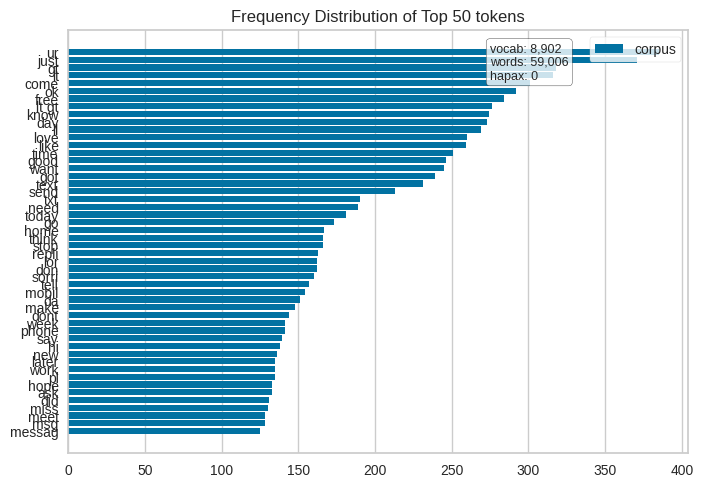

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
import numpy as np
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)
visualizer.show()

**Tokenización + Remoción de stopwords + Stemming + N-grams + Frecuencia mínima + Eliminación de caracteres irrelevantes**

Finalmente se aplica la técnica de eliminación de algunos caracteres irrelevantes, que probablemente no aportan ningún significado relevante en general. De este modo, también se reduce la cantidad de features o tokens y de palabras en el dataset. La técnica se aplicará al inicio para ya partir de esta considerable reducción de los textos. En este caso se eliminan caracteres de puntuación, el "¿", el "¡" y los dígitos.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer
import string

text_mails = df['v2'].tolist() # se obtiene la lista de textos de la columna v2

characters_to_delete = string.punctuation + "¿¡" + string.digits # se eliminan caracteres de puntuación, el "¿", el "¡" y los dígitos
for i in range(len(text_mails)):
  text_mails[i] = text_mails[i].translate(str.maketrans('', '', characters_to_delete))

stemmer = PorterStemmer() # se construye un PorterStemmer que va a ser usado para obtener la stemming word de cada token, y así agrupar varias bajo una sola

tokenizer = CountVectorizer().build_tokenizer() # se construye un tokenizer

stop_words = text.ENGLISH_STOP_WORDS

def stem_tokenizer(doc): # esta función que actuará como tokenizer del vectorizer, usa el tokenizer definido para aplicar stemming luego de tokenizar y aplicar remoción de stopwords
    tokens = tokenizer(doc)
    return list(stemmer.stem(w) for w in tokens if w not in stop_words)

vectorizer = CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', ngram_range=(1,2), min_df=2) # se consideran unigramas y bigramas, pero únicamente si tienen frecuencia 2 o más
X = vectorizer.fit_transform(text_mails)
features = vectorizer.get_feature_names_out()

print(features)
print(X.toarray())

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['aah' 'aathilov' 'aathilov lot' ... 'ìï wait' 'ìï wan' 'ûò']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Como resultado, se redujo la cantidad de features o tokens de 8902 a 8042, la cantidad de palabras de 59006 a 54151 y obviamente la cantidad de hapax se mantuvo en 0 ya que las otras técnicas se continuan aplicando por lo que siguen sin permitirse tokens con frecuencia de 1.

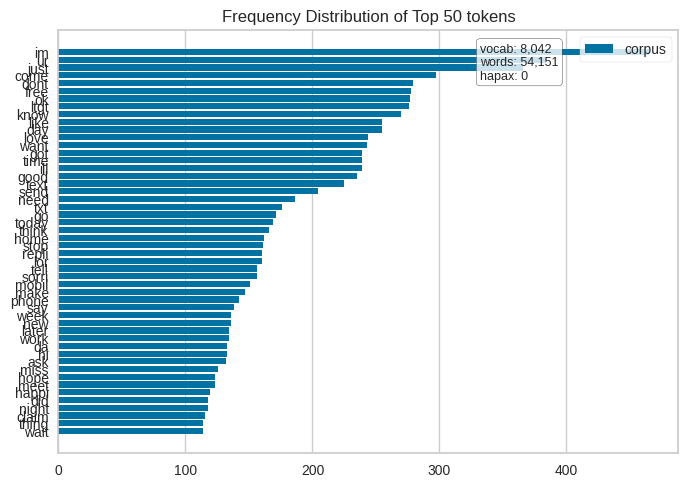

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
import numpy as np
visualizer = FreqDistVisualizer(features=features, n=min(50,len(features)),orient='h')
visualizer.fit(X)
visualizer.show()

**Conclusión**

En conclusión, se puede ver cómo al aplicar distintas técnicas de preprocesamiento el dataset va variando de tamaño, en la mayoría de los casos reduciendo la cantidad de features y/o la cantidad de palabras (sumatoria de la frecuencia de las features), como también de hapax. También puede haber ocasiones en las que se incrementen esas cantidades, como se vio en la técnica de n-gramas aumentando el tamaño del dataset en ese caso (puede haber otros casos donde esta técnica reduzca la dimensionalidad incluso, por ejemplo si no se tienen en cuenta los unigramas y además los n-gramas considerados son de demasiados tokens), a costa de poder capturar nuevas features, varias de ellas con significados probablemente relevantes para los textos que no podrían ser tenidos en cuenta solo con unigramas. También se pudo ver cómo visualizadores como el FreqDistVisualizer de yellowbrick facilitan la visualización de la aplicación de estas técnicas, y lo fundamental que es el uso de una transformación de TF-IDF a la salida de un preprocesamiento para poder conocer los pesos que tiene cada token dentro de cada uno de los documentos. A esto último se puede usar como alternativa directamente un TfidfVectorizer que aplique internamente esta transformación para no tener que hacer dicho paso de manera manual.